<a href="https://colab.research.google.com/github/MeGeertOk/INF37306/blob/main/Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Connect to GitHub repository
url = "https://raw.githubusercontent.com/MeGeertOk/INF37306/main/PESTS_V4_github.csv"

#Store data
df = pd.read_csv(url, sep = ';') #sep ; since this CSV is seperated with ; instead of comma
# #show the data
# df

In [7]:
def RBF_svr_calculation(section, week, dataframe):
  # Save dataframe as df
  df = dataframe

  # Group data by SectionId
  group = section  # Section you want to predict for

  grouped = df.groupby(df.SectionId)
  df = grouped.get_group(group)

  # Remove data after the week we want to predict for
  df = df[df['week'] <= week]

  # Sort data ascending by week
  df = df.sort_values(by="week")

  # Store the last row of data
  actual_value = df.tail(1)

  # Get all data except the last row
  df = df.head(len(df)-1)

  #Create empty lists
  weeks = list()
  adj_values = list ()  

  # Get only the date and adj_values
  df_weeks = df.loc[:,"week"]
  df_adj_values = df.loc[:,"value"]

  # Create the independent data set (dates)
  for week in df_weeks:
    weeks.append([int(week)])
  # Create the dependent data set (values)
  for value in df_adj_values:
    adj_values.append((float(value)))

  #Make the RBF model
  RBF_svr = SVR(kernel='rbf', C= 1000.0, gamma= 0.85)
  RBF_svr.fit(weeks, adj_values)

  # Value needed for plotting
  pred_weeks = RBF_svr.predict(weeks)

  # Predict the value
  week = [[week]]
  pred_value = RBF_svr.predict(week)

  # Actual value
  actual_value = actual_value["value"]

  return [pred_value, weeks, adj_values, pred_weeks, actual_value]

the RBF SVR predicted value: [14.90001322]
the actual value: [18]


<function matplotlib.pyplot.show(*args, **kw)>

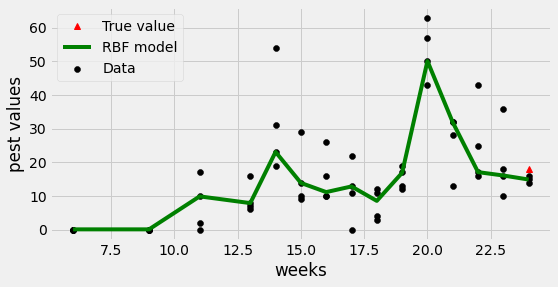

In [9]:
######################################################
#################'''USER INPUTS'''####################
######################################################

Which_Section = 13 #Section ID you want to predict amount of pests for (RANGE 9 - 27)
Which_Week = 24 #Week you want to predict for
Which_dataframe = df # Standard dataframe is df


######################################################
######################################################
######################################################

predicted_value = RBF_svr_calculation(Which_Section, Which_Week, df)
print('the RBF SVR predicted value:', predicted_value[0])
print('the actual value:', predicted_value[4].tolist())

# Plot the model
plt.figure(figsize=(8,4))
plt.scatter(predicted_value[1], predicted_value[2], color= 'black', label = 'Data')

last_datapoint= predicted_value[1]
last_datapoint = last_datapoint[-1:][0]
plt.plot(last_datapoint, predicted_value[4].tolist(), '^' , color = 'red', label = 'True value')

plt.plot(predicted_value[1], predicted_value[3], color = 'green', label = 'RBF model')

plt.xlabel('weeks')
plt.ylabel('pest values')
plt.legend()
plt.show